In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import re
import sys

In [40]:
def find_coords(filename):
    holder = []
    with open(filename, "r") as vrml:
        for i, line in enumerate(vrml):
            if i > 16:
                for line in vrml:
                    if line[1] == ']':
                        vrml.close()
                        break
                    else:
                        line = line.strip(',\n')
                        #print(line)
                        new_line = line.split()
                        for j in range(len(new_line)):
                            new_line[j] = float(new_line[j])
                        holder.append(new_line)

                break
    return np.array(holder)
    #print(holder)

In [41]:
def Visualise3d(scan_array):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(scan_array[:,0],scan_array[:,1],scan_array[:,2],s = 0.9)
    plt.show()

In [166]:
def Visualise2d(scan_array):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(scan_array[:,0],scan_array[:,1],s = 0.9)
    plt.show()

In [94]:
def leftright(scan_array):
    leftside = np.ones(3)
    rightside = np.ones(3)
    for i in range(np.shape(scan_array)[0]):
        if scan_array[i,2] >=0:
            rightside = np.vstack((rightside,scan_array[i,:]))
        if scan_array[i,2] < 0:
            leftside = np.vstack((leftside,scan_array[i,:]))

    leftside = np.delete(leftside,0,0)
    rightside = np.delete(rightside,0,0)

    maxleft = np.amax(leftside[:,0])
    maxright = np.amax(rightside[:,0])
    if maxright > maxleft:
        print('This is a left foot')

    else:
        print('This is a right foot')

In [181]:
A = find_coords("000000.wrl")
A_2D = []
A_2D = np.c_[A[:, 2], A[:, 0]]
np.shape(A)

(6620L, 3L)

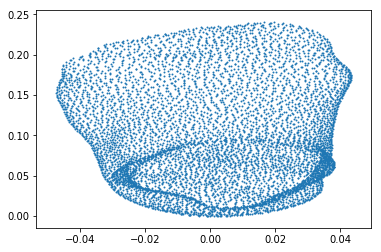

In [182]:
Visualise2d(A_2D)

In [183]:
leftright(A)

This is a left foot


In [184]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
hull = ConvexHull(A_2D)

In [185]:
C = ConvexHull(A_2D)

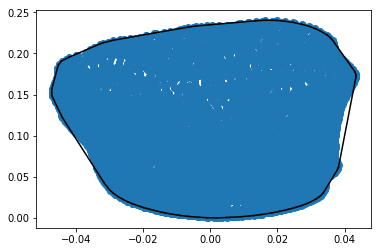

In [186]:
plt.plot(A_2D[:,0], A_2D[:,1], 'o')
for simplex in C.simplices:
    plt.plot(A_2D[simplex, 0], A_2D[simplex, 1], 'k-')

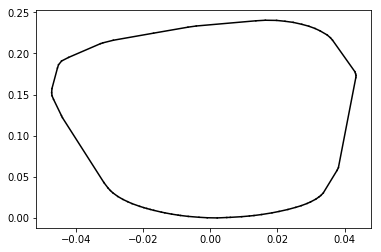

In [187]:
for simplex in C.simplices:
    plt.plot(A_2D[simplex, 0], A_2D[simplex, 1], 'k-')